In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# scalers end encoders
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from utils import MIN_YEAR, MAX_YEAR

In [2]:
old_df = pd.read_csv("data/extended_data.csv", index_col=0)
new_df = pd.read_csv("data/future_data.csv", index_col=0)

df = pd.concat([old_df, new_df], axis=0)

In [3]:
df.

,Target Coffee,Target Milk Coffee,Target Cocoa,Target Tee,Target Coffee Time,Student Price Coffee,Worker Price Coffee,Guest Price Coffee,Student Price Milk Coffee,Worker Price Milk Coffee,...,pressure,humidity,wind_speed,wind_deg,precipitation,is_holiday,is_lecture_free,is_covid,is_winter,is_summer
2017-01-09,419.0,93.0,26.0,101.0,105.0,0.94,0.84,0.84,1.36,1.31,...,1027.42,93.46,1.70,223.88,0.00,0.0,0.0,0.0,1.0,0.0
2017-01-10,446.0,83.0,31.0,83.0,110.0,0.91,0.87,0.94,1.42,1.50,...,1015.62,84.75,2.73,147.58,0.00,0.0,0.0,0.0,1.0,0.0
2017-01-11,451.0,111.0,25.0,121.0,99.0,0.92,1.01,1.12,1.40,1.31,...,1012.58,91.79,4.24,196.71,5.72,0.0,0.0,0.0,1.0,0.0
2017-01-12,411.0,97.0,29.0,92.0,126.0,0.94,0.91,0.84,1.42,1.44,...,1009.08,88.75,5.12,235.21,3.84,0.0,0.0,0.0,1.0,0.0
2017-01-13,289.0,73.0,24.0,87.0,45.0,0.92,0.84,0.84,1.40,1.31,...,998.12,87.29,7.29,245.04,7.71,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,0.0,0.0,0.0,0.0,0.0,1.26,1.36,1.63,1.85,1.87,...,1017.42,87.14,5.99,235.83,0.19,1.0,0.0,0.0,1.0,0.0
2025-12-28,0.0,0.0,0.0,0.0,0.0,1.26,1.36,1.63,1.85,1.87,...,1018.86,85.78,5.98,235.64,0.17,1.0,0.0,0.0,1.0,0.0
2025-12-29,0.0,0.0,0.0,0.0,0.0,1.26,1.36,1.63,1.85,1.87,...,1021.70,87.13,5.63,239.39,0.16,1.0,0.0,0.0,1.0,0.0
2025-12-30,0.0,0.0,0.0,0.0,0.0,1.26,1.36,1.63,1.85,1.87,...,1019.09,87.54,5.63,233.21,0.16,1.0,0.0,0.0,1.0,0.0


In [17]:
df = pd.read_excel("Mensa DS/Heissgetraenke Cafeteria BT 2017-09_2024.xlsx")

In [18]:
df.head(3)

,Satz,Kasse Nr.,Kasse,Kassenblatt Nr.,Trans Nr.,Datum Arbeitstag,TransPos. Nr.,Trans-Typ,Typ,VbGrp Nr.,...,Gebinde Nr.,Gebinde,Menge,E-Preis,G-Preis,Netto,Steuer,Steuer %,Pos-Status,Vk-Umsatzgruppe Nr.
0,1,8,Cafeteria BT Kasse 1,1,6,2017-01-09 07:50:02,2,Verkauf,Artikel,0,...,10723,Kaffee,1,0.9,0.9,0.9,0.0,0,-,303
1,2,8,Cafeteria BT Kasse 1,1,25,2017-01-09 07:55:30,2,Verkauf,Artikel,0,...,10723,Kaffee,1,0.9,0.9,0.9,0.0,0,-,303
2,3,8,Cafeteria BT Kasse 1,1,28,2017-01-09 07:56:13,1,Verkauf,Artikel,0,...,10723,Kaffee,1,0.9,0.9,0.9,0.0,0,-,303


### Description for columns

Satz = Just position of a line in the DataFrame. Useless  
Kasse Nr. = Number (ID) of a Desk. Useless.  
Kasse = Just Name of Desk. Can be used for statistics.  
Kassenblatt Nr. = Number of a list. Corresponds to just a number of a day. Useless.  
Trans Nr. = Transaction number. Useless.  
Datum Arbeitstag = Date of sale.  
TransPos. Nr. = ??? Looks like useless.  
Trans-Typ = Type of Transaction. Same Value Everywhere. Useless.  
Typ = Same Value Everywhere . Useless.  
VbGrp Nr. = Who did a Purchaise 0 - Student, 3 - Gäste, 1 - Bedienstet, 5-Fö-Lehrer/Schüler, 2 - Beamte FH Hof.  
Verbrauchergruppe == Name of clients group.  
ZArt Nr. = Payment Method ID. Useless.  
Zahlungsart = Pyment Method Name. 99.8% of transactions are "Mensakarte". Looks useless.  
Verkaufsart = Some Strange Data (Im Haus Kasse Standard', 'Zuschuss Student', 'Gutschein Schwimmbadmarken', 'Waschmarken Frankengut', 'To Go'). 99% are "Im Haus Kasse Standard". Looks useless.

Beleg-Nr. = Receipt Data. Unique for each day. Useless.  
Artikel Nr. = Product ID. Same value everywhere. Useless.  
Bezeichnung = Product Name.  
Gebinde Nr. = Another Product ID.  
Gebinde = Another Product Name.  
Menge = Amount sold.  
E-Preis = Total Price for one Unit (Netto + Tax).  
G-Preis = Total Price for all Amount.  
Netto = Unit cost without tax.  
Steuer = Tax Amount per Unit.  
Steuer % = Tax Percent.  
Pos-Status = Most of values are empty. Has small amount of unique values.  
Vk-Umsatzgruppe Nr. = Same Value Everywhere. Useless.  

In [19]:
useless_data = set([
    "Satz",
    "Kasse Nr.",
    "Kassenblatt Nr.",
    "Trans Nr.",
    "TransPos. Nr.",
    "Trans-Typ",
    "Typ",
    "VbGrp Nr.",
    "ZArt Nr.",
    "Zahlungsart",
    "Verkaufsart",
    "Beleg-Nr.",
    "Vk-Umsatzgruppe Nr.",
    "Pos-Status",
    "Artikel Nr.",
    "Bezeichnung", # comment if required
    "Gebinde Nr.", # comment if required
])
    
statistics_columns = set([
    "Kasse",
    "Verbrauchergruppe",
    "E-Preis",
    "G-Preis",
    "Steuer",
])

In [20]:
# drop useless columns
df = df.drop(columns=useless_data, axis=1)
# filtersome data
df = df[~df["Verbrauchergruppe"].isin(["Fö-Lehrer/Schüler", "Beamte FH Hof"])]
df.head(3)

,Kasse,Datum Arbeitstag,Verbrauchergruppe,Gebinde,Menge,E-Preis,G-Preis,Netto,Steuer,Steuer %
0,Cafeteria BT Kasse 1,2017-01-09 07:50:02,Student,Kaffee,1,0.9,0.9,0.9,0.0,0
1,Cafeteria BT Kasse 1,2017-01-09 07:55:30,Student,Kaffee,1,0.9,0.9,0.9,0.0,0
2,Cafeteria BT Kasse 1,2017-01-09 07:56:13,Student,Kaffee,1,0.9,0.9,0.9,0.0,0


### Check relations between fields that define product

In [7]:
# check relations between fields that define 
"""
Bezeichnung = Product Name.
Gebinde Nr. = Another Product ID.
Gebinde = Another Product Name.
"""
df_products = df[["Bezeichnung", "Gebinde Nr.", "Gebinde"]]

In [8]:
name_to_number = dict()
number_to_bind = dict()
bind_to_name = dict()

for line in df_products.itertuples(index=False):
    name, number, bind = tuple(line)
    
    # create if not yet
    if name not in name_to_number:
        name_to_number[name] = set()
        
    if number not in number_to_bind:
        number_to_bind[number] = set()
        
    if bind not in bind_to_name:
        bind_to_name[bind] = set()
        
    # save data
    name_to_number[name].add(number)
    number_to_bind[number].add(bind)
    bind_to_name[bind].add(name)

The results:

1) Each "Gebinde" defines one art of product. 
   Possible values: 'Kaffee', 'Cappuccino/Milchkaffee', 'Kakao warm', 'Tee', 'Coffee Time', 'Teewasser', 'Coffee Time 2,20€'

2) Fields "Gebinde Nr." and "Bezeichnug" have an almost perfect match. Difference in Kaffee and Kaffee groß.'  
   {  
     'Kaffee': {10723},  
     'Cappuccino/Milchkaffee': {10722},  
     'Kakao warm': {10724},  
     'Tee': {10905},  
     'STORNO Tee': {10905},  
     'Coffee Time': {10721},  
     'Teewasser': {10906},  
     'STORNO Teewasser': {10906},  
     'STORNO Kaffee': {10723},  
     'STORNO Kakao warm': {10724},  
     'STORNO Cappuccino/Milchkaffee': {10722},  
     'STORNO Coffee Time': {10721},  
     'Kaffee groß': {10723},  
     'STORNO Kaffee groß': {10723},  
     'Coffee Time 2,20€': {21543},  
     'STORNO Coffee Time 2,20€': {21543}  
   }
  
#### Question - how to handle STORNO? What is a STORNO in this case because it is positive and negative simultaneously !!!

In [19]:
# define STORNO positions and split two datasets
STORNO = "STORNO"

def is_storno(line: str) -> bool:
    return STORNO in line.split()

storno_mask = df["Bezeichnung"].apply(is_storno)
df[storno_mask].describe()

,VbGrp Nr.,Gebinde Nr.,Menge,E-Preis,G-Preis,Netto,Steuer,Steuer %
count,9579.000000,9579.000000,9579.000000,9579.000000,9579.000000,9579.000000,9579.00000,9579.000000
mean,0.223927,10756.683161,-1.069110,1.100016,-1.204927,-1.154637,-0.05029,4.379058
std,0.724585,170.647897,0.371271,0.480745,0.669597,0.641871,0.05204,3.386600
min,0.000000,10721.000000,-8.000000,0.000000,-7.500000,-7.010000,-0.49000,0.000000
25%,0.000000,10722.000000,-1.000000,0.900000,-1.500000,-1.500000,-0.09000,0.000000
50%,0.000000,10723.000000,-1.000000,1.100000,-1.200000,-1.170000,-0.06000,7.000000
75%,0.000000,10724.000000,-1.000000,1.500000,-0.900000,-0.840000,0.00000,7.000000
max,5.000000,21543.000000,3.000000,2.200000,4.200000,3.930000,0.27000,7.000000


In [21]:
df[~storno_mask].describe()

,VbGrp Nr.,Gebinde Nr.,Menge,E-Preis,G-Preis,Netto,Steuer,Steuer %
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,0.194444,10753.513514,-1.090090,1.075676,-1.174677,-1.163664,-0.011014,0.942943
std,0.639684,68.711872,0.352291,0.441747,0.662980,0.645604,0.038873,2.376580
min,0.000000,10721.000000,-7.000000,0.100000,-11.900000,-11.120000,-0.780000,0.000000
25%,0.000000,10722.000000,-1.000000,0.900000,-1.500000,-1.500000,0.000000,0.000000
50%,0.000000,10723.000000,-1.000000,1.000000,-1.100000,-1.100000,0.000000,0.000000
75%,0.000000,10723.000000,-1.000000,1.400000,-0.900000,-0.900000,0.000000,0.000000
max,5.000000,10906.000000,-1.000000,2.100000,-0.100000,-0.090000,0.000000,7.000000


### Gather some statistics 

In [21]:
# get data only after 01.01.2022 (After Corona)
START_DATE = datetime(2017, 1, 9)
statistic_df = df[df["Datum Arbeitstag"] >= START_DATE].copy()
#statistic_df = df.copy()

DATE = "Datum Arbeitstag"
YEAR = "Year"
MONTH = "Month"
DAY = "Day"
WEEK = "Week"

In [22]:
# 1. Year
statistic_df[YEAR] = statistic_df[DATE].apply(lambda date: date.year)

# 2. Month name
statistic_df[MONTH] = statistic_df[DATE].apply(lambda date: date.strftime('%B'))

# 3. Day name
statistic_df[DAY] = statistic_df[DATE].apply(lambda date: date.strftime('%A'))

# 4. Week number
statistic_df[WEEK] = statistic_df[DATE].apply(lambda date: date.isocalendar().week)

In [23]:
statistic_df.head(3)

,Kasse,Datum Arbeitstag,Verbrauchergruppe,Gebinde,Menge,E-Preis,G-Preis,Netto,Steuer,Steuer %,Year,Month,Day,Week
0,Cafeteria BT Kasse 1,2017-01-09 07:50:02,Student,Kaffee,1,0.9,0.9,0.9,0.0,0,2017,January,Monday,2
1,Cafeteria BT Kasse 1,2017-01-09 07:55:30,Student,Kaffee,1,0.9,0.9,0.9,0.0,0,2017,January,Monday,2
2,Cafeteria BT Kasse 1,2017-01-09 07:56:13,Student,Kaffee,1,0.9,0.9,0.9,0.0,0,2017,January,Monday,2


In [24]:
# Year dynamic
year_df = statistic_df.groupby(by=[YEAR, "Gebinde"])["Menge"].sum().reset_index(drop=False)

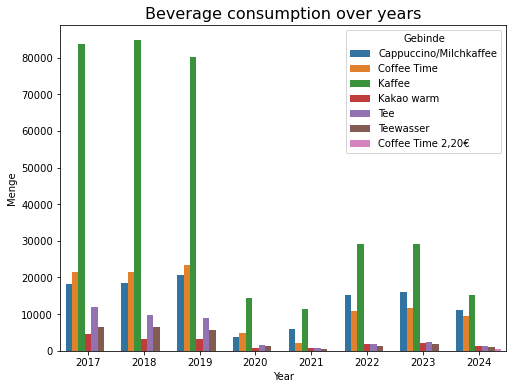

In [25]:
# Figure
plt.figure(figsize=(8, 6))
# Add a title
plt.title("Beverage consumption over years", fontsize=16)
# BarPlot
sns.barplot(data=year_df, x=YEAR, y="Menge", hue="Gebinde", )
plt.show()

In [26]:
statistic_df["Verbrauchergruppe"].value_counts() / len(statistic_df)

Student       0.887741
Bedienstet    0.087626
Gäste         0.024633
Name: Verbrauchergruppe, dtype: float64

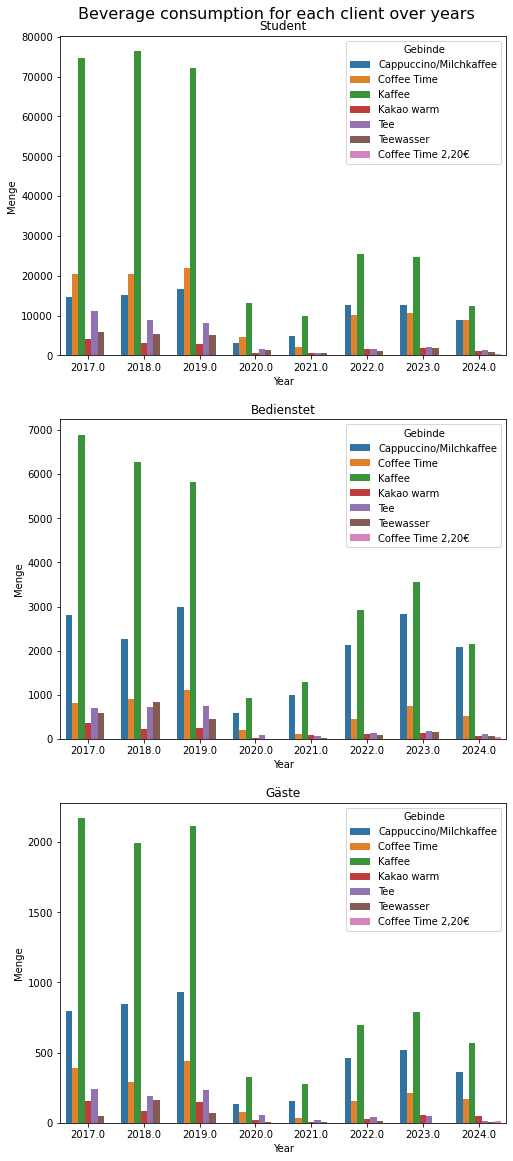

In [27]:
fig, axs = plt.subplots(figsize=(8, 20), 
                        nrows=len(statistic_df["Verbrauchergruppe"].unique()), 
                        ncols=1)

# Add a title
fig.suptitle(f"Beverage consumption for each client over years", fontsize=16, y=0.9)
#fig.tight_layout(rect=[0, 0.05, 1, 0.90])

for client, ax in zip(statistic_df["Verbrauchergruppe"].unique(), axs):
    # Get data by client
    sub_df = statistic_df.where(statistic_df["Verbrauchergruppe"] == client).dropna()
    # Group it
    sub_df = sub_df.groupby(by=[YEAR, "Gebinde"])["Menge"].sum().reset_index(drop=False)
    # Plot it
    sns.barplot(data=sub_df, x=YEAR, y="Menge", hue="Gebinde", ax=ax)
    # Title
    ax.set_title(client)

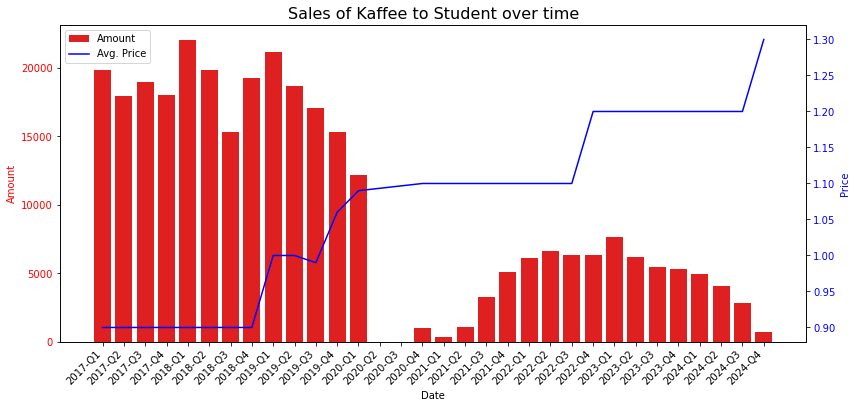

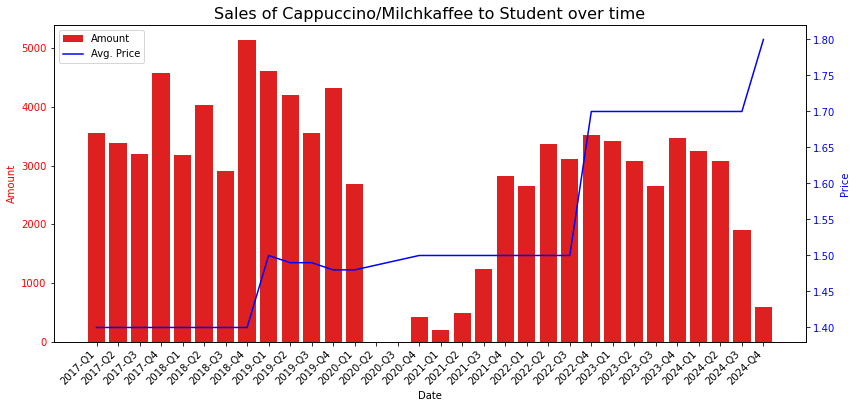

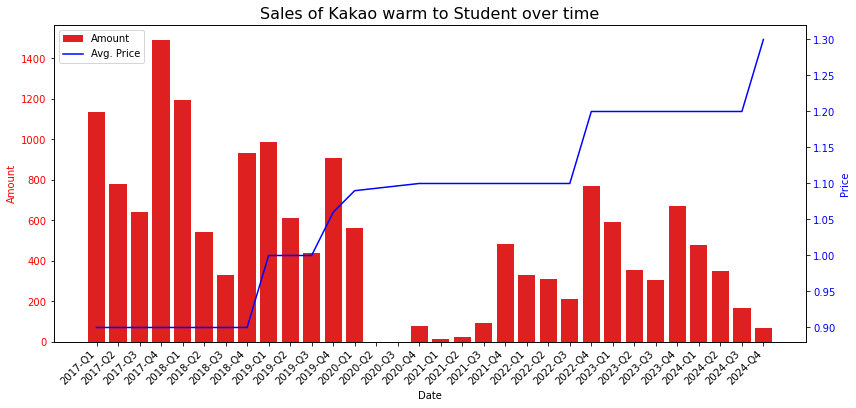

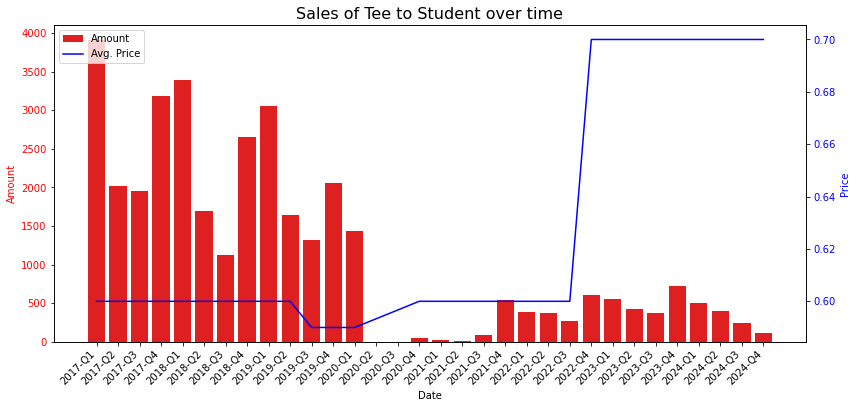

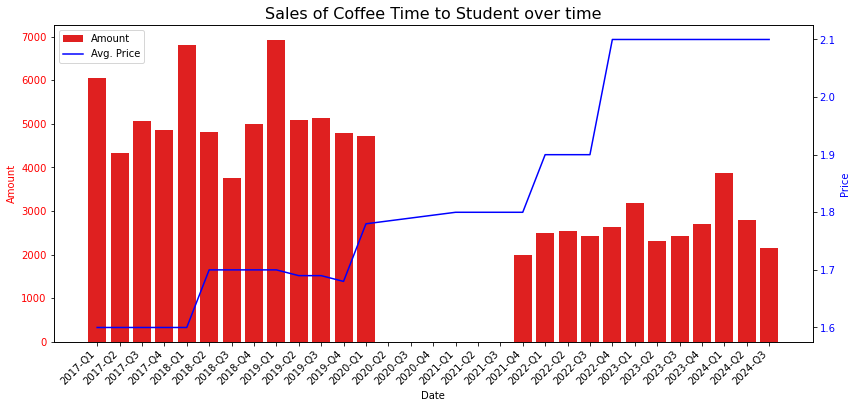

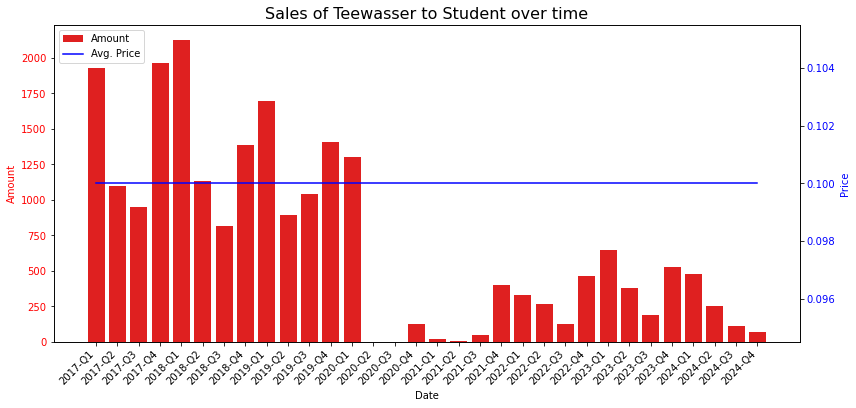

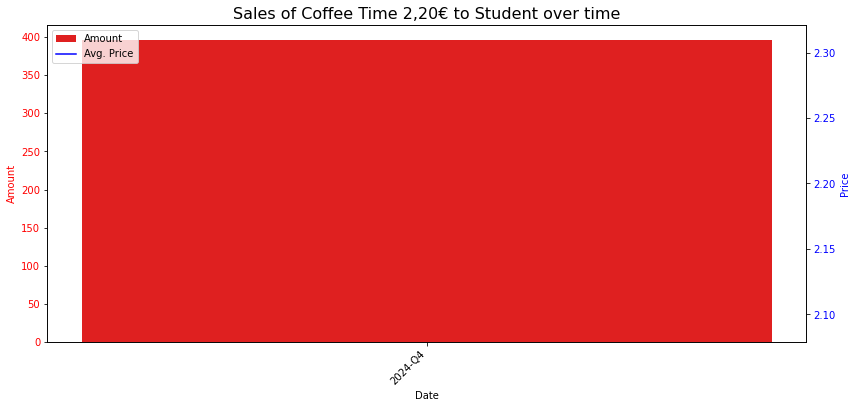

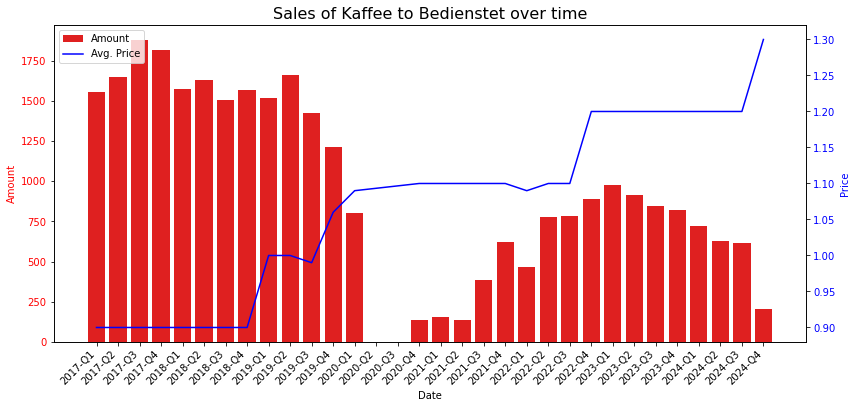

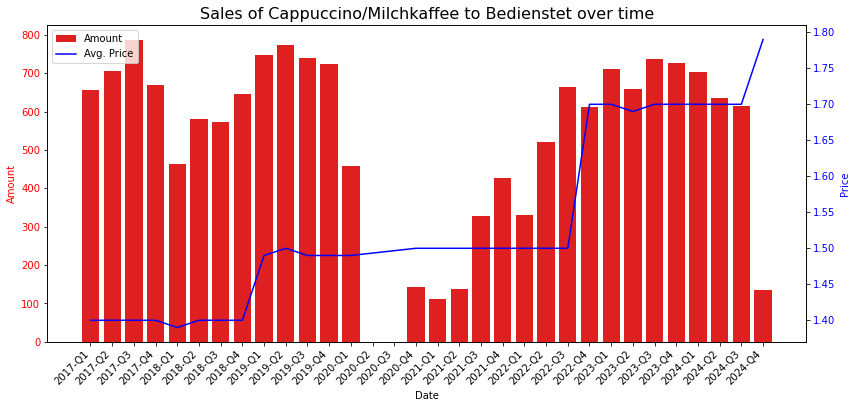

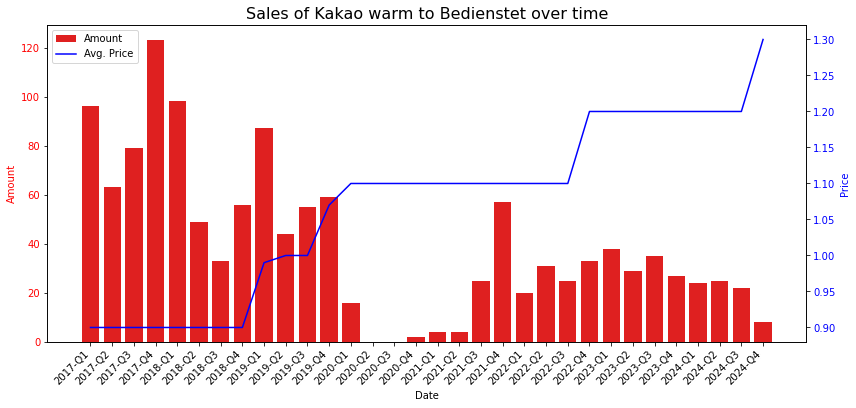

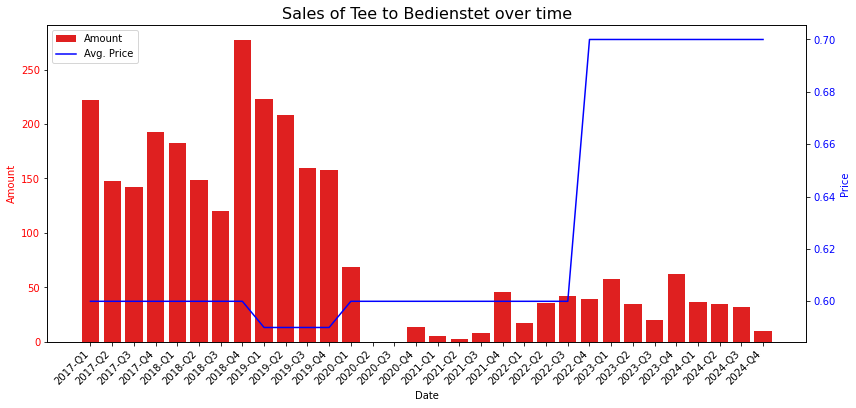

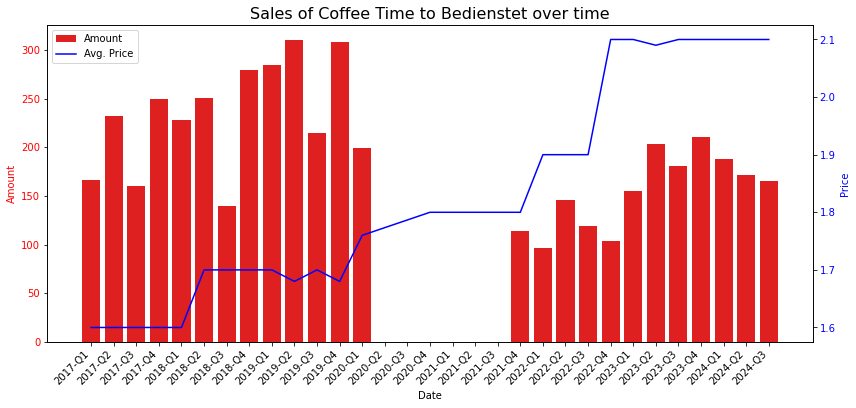

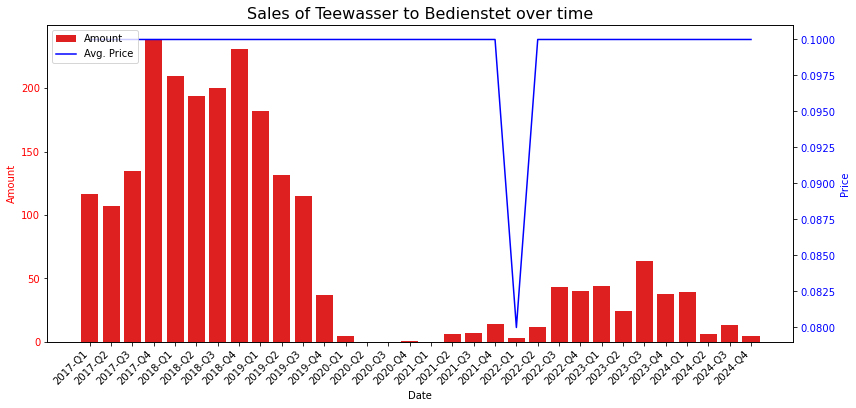

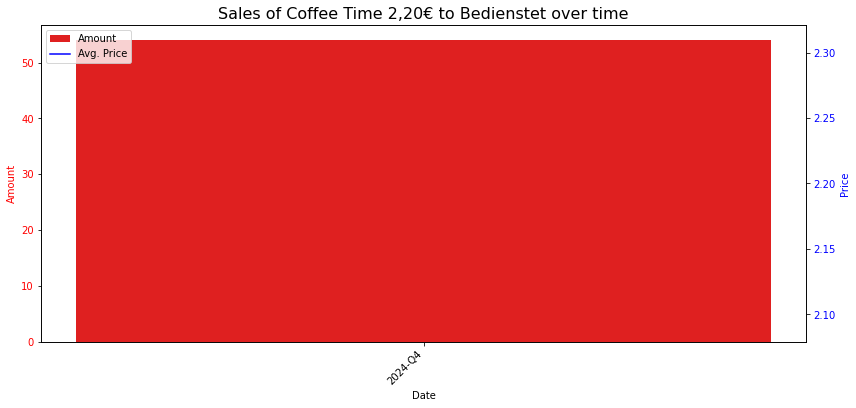

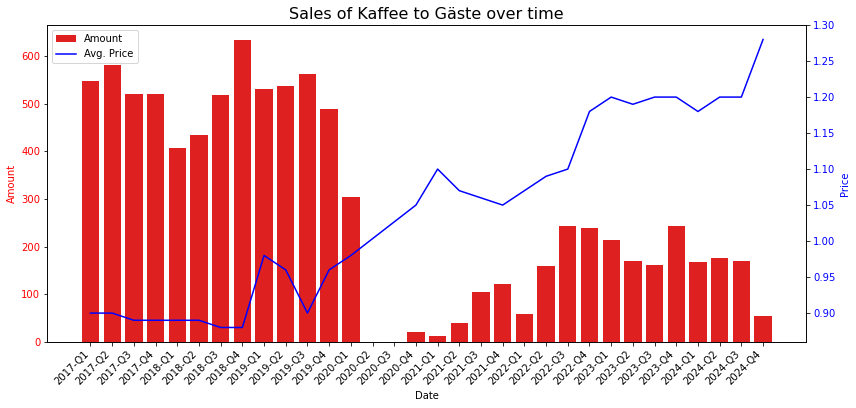

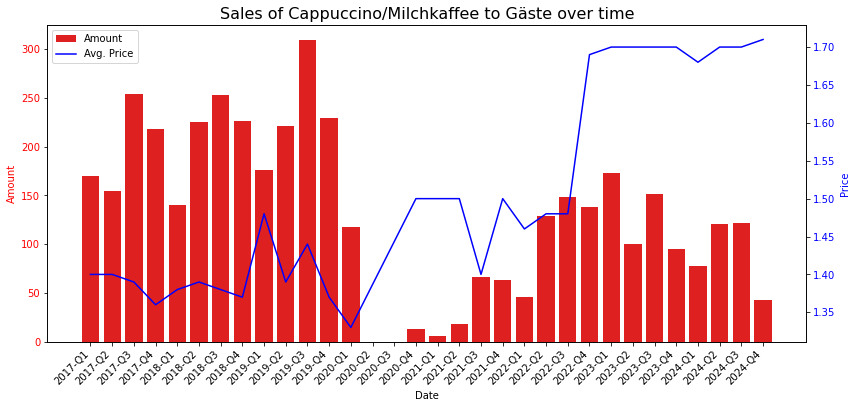

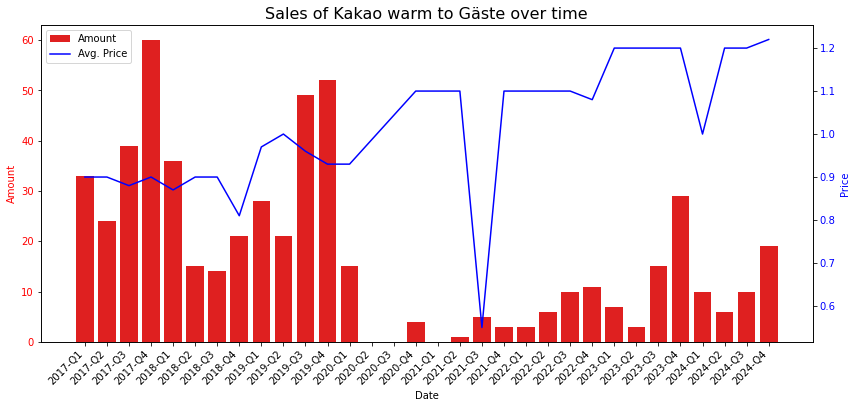

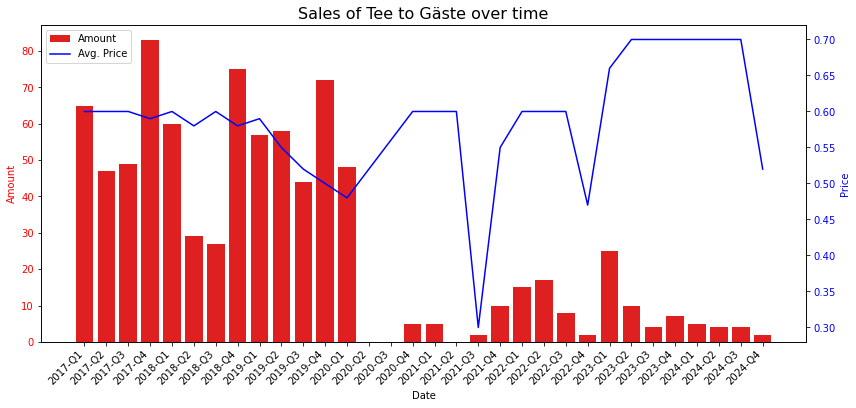

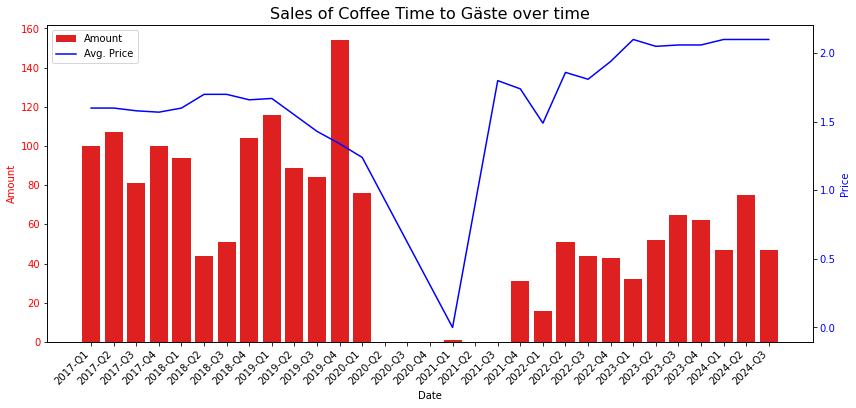

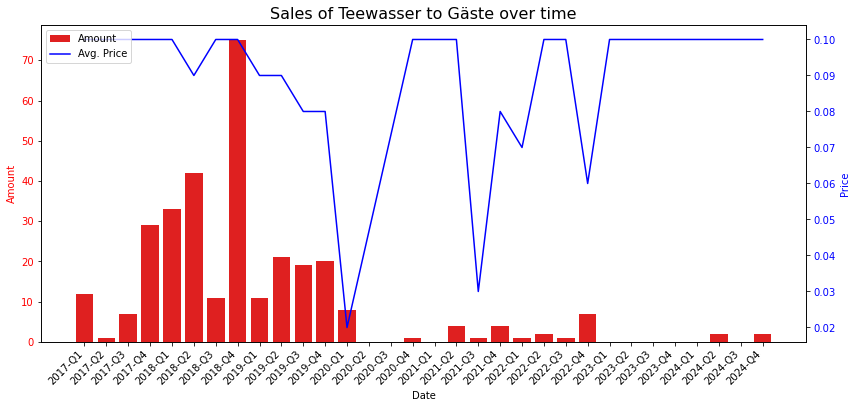

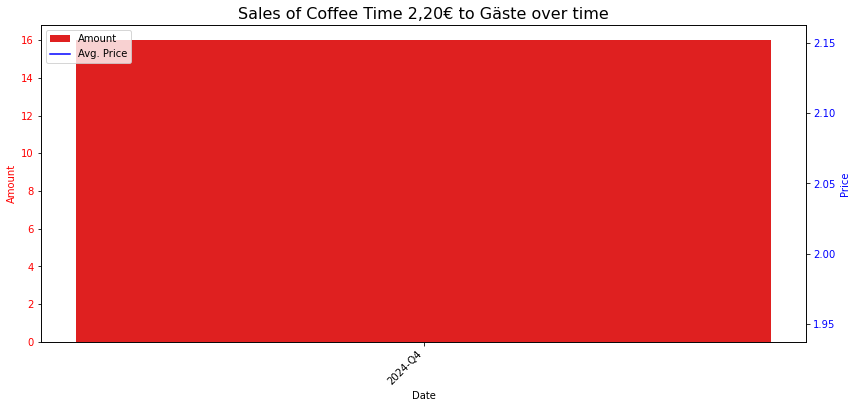

In [28]:
# Client Group Data with price
def date_to_quarter(date):
    year = date.year
    quarter = (date.month - 1) // 3 + 1
    return f"{year}-Q{quarter}"

for client in statistic_df["Verbrauchergruppe"].unique():
    for beverage in statistic_df["Gebinde"].unique():
        # Get data regarding beverage
        sub_df = statistic_df.where(
            (statistic_df["Verbrauchergruppe"] == client) & (statistic_df["Gebinde"] == beverage)
        ).dropna()
        # Grouping
        sub_df = sub_df.groupby(
            pd.Grouper(key="Datum Arbeitstag", 
                       freq="Q"
                      )
        ).agg(
            {"E-Preis": "mean", "Menge": "sum"}
        ).reset_index(drop=False)
        
        # Create sample data
        sub_df = pd.DataFrame({'Date': sub_df["Datum Arbeitstag"].apply(date_to_quarter),# .dt.strftime("%Y-%m"), 
                               'Avg. Price': sub_df["E-Preis"].round(2), 
                               'Amount': sub_df["Menge"]
                              })
        
        # Set up the plot
        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax2 = ax1.twinx()
        
        # Plot price on the left y-axis
        sns.barplot(data=sub_df, x='Date', y='Amount', ax=ax1, color='red', label='Amount')
        ax1.set_ylabel('Amount', color='red')
        ax1.tick_params(axis='y', labelcolor='red')
        
        # Plot amount on the right y-axis
        sns.lineplot(data=sub_df, x='Date', y='Avg. Price', ax=ax2, color='blue', label='Avg. Price')
        ax2.set_ylabel('Price', color='blue')
        ax2.tick_params(axis='y', labelcolor='blue')

        # Set title and adjust layout
        plt.title(f"Sales of {beverage} to {client} over time", fontsize=16)
        fig.tight_layout()
        
        # Add legend
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        # Rotate and align the tick labels so they look better
        plt.gcf().autofmt_xdate(rotation=45)
        
        plt.show()

# Create DataFrame with all available data

In [31]:
# not very interesting beverages
not_interesting_beverages = ["Coffee Time 2,20€", "Teewasser"]

# copy and drop some useless data
beverages_df = statistic_df[~statistic_df["Gebinde"].isin(not_interesting_beverages)].copy()

# convert tax to percent value
beverages_df["Steuer %"] /= 100.0

# get targets
targets = beverages_df.groupby(
    by=[
        pd.Grouper(key="Datum Arbeitstag", freq="D"),
        pd.Grouper(key="Gebinde")
    ]
).agg({"Menge": "sum"})

# taxes
taxes = beverages_df.groupby(
    by=pd.Grouper(key="Verbrauchergruppe")
).agg({"Steuer %": "mean"})

# get prices for each category for each day
prices = beverages_df.groupby(
    by = [
        pd.Grouper(key="Datum Arbeitstag", freq="D"),
        pd.Grouper(key="Gebinde"),
        pd.Grouper(key="Verbrauchergruppe")
    ]
).agg({"Netto": "mean"})
prices_year = beverages_df.groupby(
    by = [
        pd.Grouper(key="Year"),
        pd.Grouper(key="Gebinde"),
        pd.Grouper(key="Verbrauchergruppe")
    ]
).agg({"Netto": "mean"})


# use one hot encoder for day of week and month
day_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
month_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit the data
unique_days = np.array(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).reshape(-1, 1)
unique_months = np.array([
    "January", 
    "February", 
    "March", 
    "April", 
    "May", 
    "June", 
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
]).reshape(-1, 1)
day_encoder.fit(unique_days) # beverages_df[['Day']]
month_encoder.fit(unique_months) # beverages_df[['Month']]

# delete useless columns
beverages_df = beverages_df.drop(columns=statistics_columns, axis=0)
beverages_df = beverages_df.drop(columns=["Gebinde"], axis=0)

beverages_df.head(3)

,Datum Arbeitstag,Menge,Netto,Steuer %,Year,Month,Day,Week
0,2017-01-09 07:50:02,1,0.9,0.0,2017,January,Monday,2
1,2017-01-09 07:55:30,1,0.9,0.0,2017,January,Monday,2
2,2017-01-09 07:56:13,1,0.9,0.0,2017,January,Monday,2


In [33]:
# create absolutely new dataset from existing data with full information
END_DATE = beverages_df["Datum Arbeitstag"].max()

full_timeline = [START_DATE + timedelta(n) for n in range(int((END_DATE - START_DATE).days) + 1)]

# create features
new_features = [
    # targets
    "Target Coffee",
    "Target Milk Coffee",
    "Target Cocoa",
    "Target Tee",
    "Target Coffee Time",
    # prices
    "Student Price Coffee", 
    "Worker Price Coffee", 
    "Guest Price Coffee",
    "Student Price Milk Coffee", 
    "Worker Price Milk Coffee", 
    "Guest Price Milk Coffee",
    "Student Price Cocoa", 
    "Worker Price Milk Cocoa", 
    "Guest Price Milk Cocoa",
    "Student Price Tee", 
    "Worker Price Tee", 
    "Guest Price Tee",
    "Student Price Coffee Time", 
    "Worker Price Coffee Time", 
    "Guest Price Coffee Time",
    # taxes
    "Student Tax", 
    "Worker Tax", 
    "Guest Tax",
    # time
    "Week", "Year",
] + list(day_encoder.get_feature_names_out()) + list(month_encoder.get_feature_names_out())

# create a df 
new_df = pd.DataFrame(columns=new_features)

_guest_price_coffee = prices_year.loc[(MIN_YEAR, "Kaffee", "Gäste")]["Netto"]
_guest_price_milk_coffee = prices_year.loc[(MIN_YEAR, "Cappuccino/Milchkaffee", "Gäste")]["Netto"]
_guest_price_cocoa = prices_year.loc[(MIN_YEAR, "Kakao warm", "Gäste")]["Netto"]
_guest_price_tee = prices_year.loc[(MIN_YEAR, "Tee", "Gäste")]["Netto"]
_guest_price_coffee_time = prices_year.loc[(MIN_YEAR, "Coffee Time", "Gäste")]["Netto"]

for day in full_timeline:
    # get data about time
    _timestamp = pd.Timestamp(day)
    
    # get prices if not, assign to previous values
    try:
        # get tax for students
        _student_tax = taxes.loc["Student", "Steuer %"]
        # get prices for students
        _student_price_coffee = prices.loc[(_timestamp, "Kaffee", "Student")]["Netto"]
        _student_price_milk_coffee = prices.loc[(_timestamp, "Cappuccino/Milchkaffee", "Student")]["Netto"]
        _student_price_cocoa = prices.loc[(_timestamp, "Kakao warm", "Student")]["Netto"]
        _student_price_tee = prices.loc[(_timestamp, "Tee", "Student")]["Netto"]
        _student_price_coffee_time = prices.loc[(_timestamp, "Coffee Time", "Student")]["Netto"]
    except:
        pass
    #
    try:
        # get tax for workers
        _work_tax = taxes.loc["Bedienstet", "Steuer %"]
        # get prices for workers
        _work_price_coffee = prices.loc[(_timestamp, "Kaffee", "Bedienstet")]["Netto"]
        _work_price_milk_coffee = prices.loc[(_timestamp, "Cappuccino/Milchkaffee", "Bedienstet")]["Netto"]
        _work_price_cocoa = prices.loc[(_timestamp, "Kakao warm", "Bedienstet")]["Netto"]
        _work_price_tee = prices.loc[(_timestamp, "Tee", "Bedienstet")]["Netto"]
        _work_price_coffee_time = prices.loc[(_timestamp, "Coffee Time", "Bedienstet")]["Netto"]
    except:
        pass
    #
    try:
        # get tax for guests
        _guest_tax = taxes.loc["Gäste", "Steuer %"]
        # get prices for guests
        _guest_price_coffee = prices.loc[(_timestamp, "Kaffee", "Gäste")]["Netto"]
        _guest_price_milk_coffee = prices.loc[(_timestamp, "Cappuccino/Milchkaffee", "Gäste")]["Netto"]
        _guest_price_cocoa = prices.loc[(_timestamp, "Kakao warm", "Gäste")]["Netto"]
        _guest_price_tee = prices.loc[(_timestamp, "Tee", "Gäste")]["Netto"]
        _guest_price_coffee_time = prices.loc[(_timestamp, "Coffee Time", "Gäste")]["Netto"]
    except:
        pass
    
    # get target amounts for each beverage
    try:
        _target_coffee = targets.loc[(_timestamp, "Kaffee")]["Menge"]
    except:
        _target_coffee = 0.0
    try:
        _target_milk_coffee = targets.loc[(_timestamp, "Cappuccino/Milchkaffee")]["Menge"]
    except:
        _target_milk_coffee = 0.0
    try:
        _target_cocoa = targets.loc[(_timestamp, "Kakao warm")]["Menge"]
    except:
        _target_cocoa = 0.0
    try:
        _target_tee = targets.loc[(_timestamp, "Tee")]["Menge"]
    except:
        _target_tee = 0.0
    try:
        _target_coffee_time = targets.loc[(_timestamp, "Coffee Time")]["Menge"]
    except:
        _target_coffee_time = 0.0

    
    # get day week and year
    _week = day.isocalendar().week
    _year = day.year
    
    # day of week and month
    _month_name = day.strftime('%B')
    _day_name = day.strftime('%A')
    
    _month = list(month_encoder.transform([[_month_name]])[0])
    _day = list(day_encoder.transform([[_day_name]])[0])
    
    # save all the data
    data = [
        # targets
        _target_coffee,
        _target_milk_coffee,
        _target_cocoa,
        _target_tee,
        _target_coffee_time,
        # prices 
        ## coffee
        _student_price_coffee,
        _work_price_coffee,
        _guest_price_coffee,
        # milk coffee
        _student_price_milk_coffee,
        _work_price_milk_coffee,
        _guest_price_milk_coffee,
        # cocoa
        _student_price_cocoa,
        _work_price_cocoa,
        _guest_price_cocoa,
        # tee
        _student_price_tee,
        _work_price_tee,
        _guest_price_tee,
        # coffee time
        _student_price_coffee_time,
        _work_price_coffee_time,
        _guest_price_coffee_time,
        # taxes
        _student_tax, 
        _work_tax, 
        _guest_tax, 
        # time
        _week, _year
    ] + _day + _month
    
    new_df.loc[_timestamp] = data


new_df = new_df.round(decimals=2)
new_df.head(3)

,Target Coffee,Target Milk Coffee,Target Cocoa,Target Tee,Target Coffee Time,Student Price Coffee,Worker Price Coffee,Guest Price Coffee,Student Price Milk Coffee,Worker Price Milk Coffee,...,x0_December,x0_February,x0_January,x0_July,x0_June,x0_March,x0_May,x0_November,x0_October,x0_September
2017-01-09,419.0,93.0,26.0,101.0,105.0,0.94,0.84,0.84,1.36,1.31,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-10,446.0,83.0,31.0,83.0,110.0,0.91,0.87,0.94,1.42,1.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-11,451.0,111.0,25.0,121.0,99.0,0.92,1.01,1.12,1.40,1.31,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
new_df.to_csv("data/daily_data.csv")